In [1]:
!pip install kaggle

In [2]:
!kaggle datasets download -d lainguyn123/student-performance-factors


Dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
License(s): CC0-1.0
  0% 0.00/93.9k [00:00<?, ?B/s]
100% 93.9k/93.9k [00:00<00:00, 53.7MB/s]


In [3]:
!unzip student-performance-factors.zip -d dataset


Archive:  student-performance-factors.zip
  inflating: dataset/StudentPerformanceFactors.csv  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)
# Đọc dữ liệu
path = "/content/dataset"
df = pd.read_csv(f"{path}/StudentPerformanceFactors.csv")

df = df.dropna()

In [5]:
# Mã hóa các cột dữ liệu categorical
encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
        encoders[col] = encoder

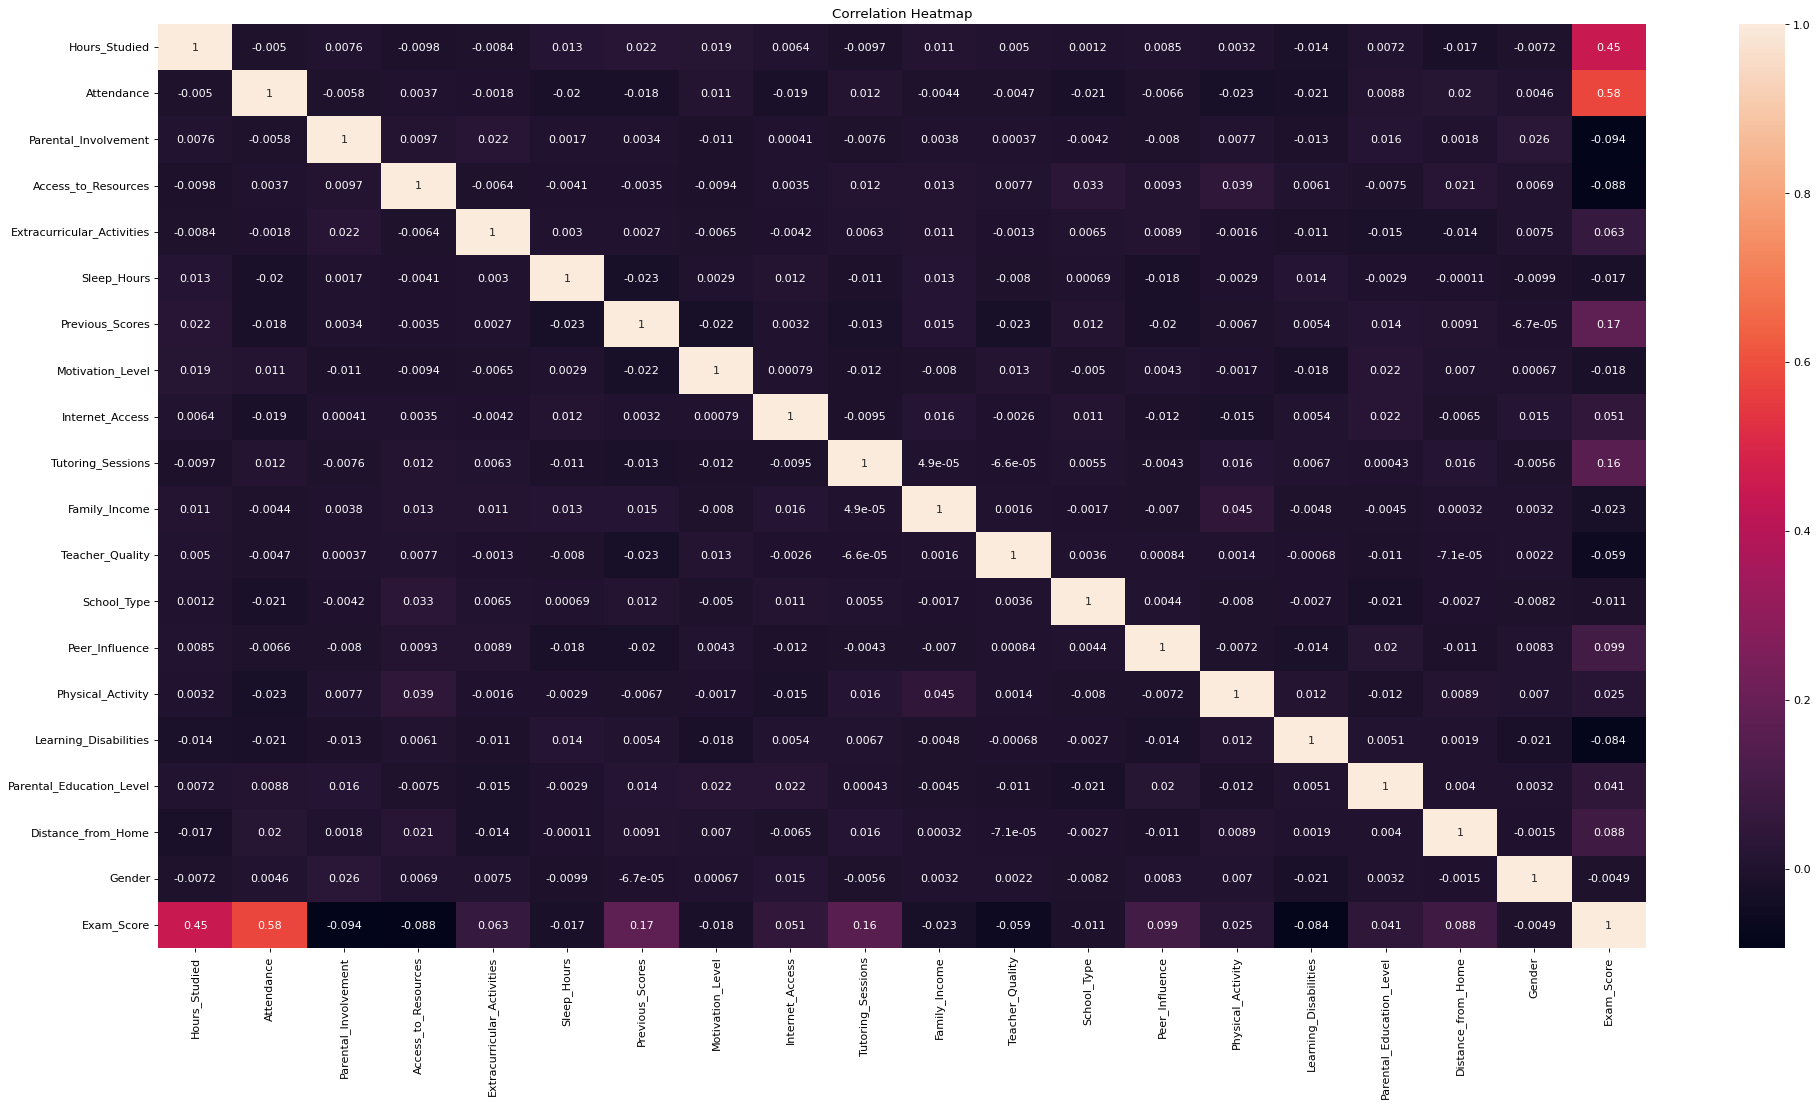

In [6]:

# Vẽ heatmap tương quan
target = 'Exam_Score'
plt.figure(figsize=(30, 15), dpi=80)
sns.heatmap(pd.concat([df.drop(target, axis=1), df[target]], axis=1).corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

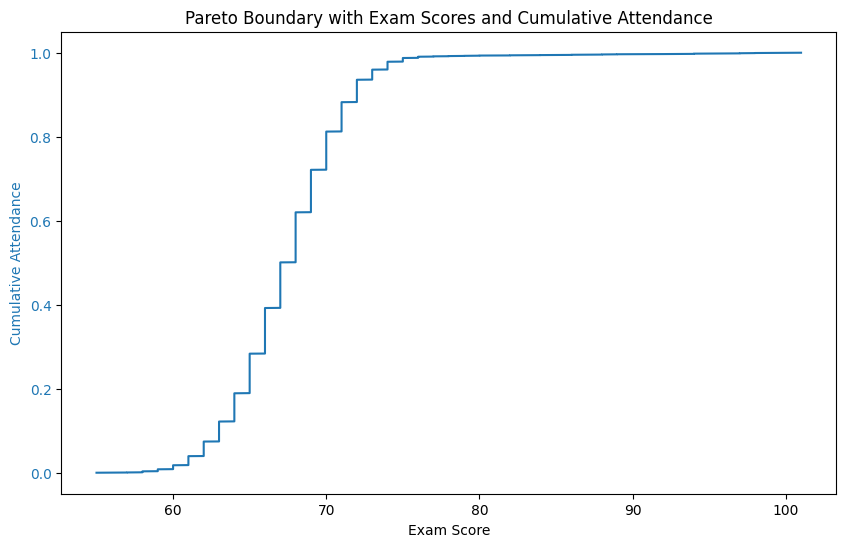

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Giả sử df đã có các đặc trưng 'Exam_Score', và 'Attendance'
df_sorted = df.sort_values(by='Exam_Score')

# Tính tổng và hệ số tích lũy (Cumulative) cho Attendance
total_attendance = df_sorted['Attendance'].sum()
df_sorted['Cumulative_Attendance'] = df_sorted['Attendance'].cumsum() / total_attendance


fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Exam Score')
ax1.set_ylabel('Cumulative Attendance', color='tab:blue')
ax1.plot(df_sorted['Exam_Score'], df_sorted['Cumulative_Attendance'], color='tab:blue', label='Cumulative Attendance')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Thêm tiêu đề và hiển thị
plt.title('Pareto Boundary with Exam Scores and Cumulative Attendance')
plt.show()


In [18]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Failing,Hours_Category,Attendance_Category,Previous_Scores_Category,Tutoring_Category
0,23,84,1,0,0,7,73,1,1,0,...,0,1,2,1,67,False,High Hours (Above 10),Moderate Attendance (70%-90%),High Previous Scores (Above 60),Low Tutoring (less than 3 sessions)
1,19,64,1,2,0,8,59,1,1,2,...,0,0,1,0,61,False,High Hours (Above 10),Low Attendance (Below 70%),Low Previous Scores (Below 60),Low Tutoring (less than 3 sessions)
2,24,98,2,2,1,7,91,2,1,2,...,0,2,2,1,74,False,High Hours (Above 10),High Attendance (Above 90%),High Previous Scores (Above 60),Low Tutoring (less than 3 sessions)
3,29,89,1,2,1,8,98,2,1,1,...,0,1,1,1,71,False,High Hours (Above 10),Moderate Attendance (70%-90%),High Previous Scores (Above 60),Low Tutoring (less than 3 sessions)
4,19,92,2,2,1,6,65,2,1,3,...,0,0,2,0,70,False,High Hours (Above 10),High Attendance (Above 90%),High Previous Scores (Above 60),High Tutoring (3 or more sessions)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,...,0,1,2,0,68,False,High Hours (Above 10),Low Attendance (Below 70%),High Previous Scores (Above 60),Low Tutoring (less than 3 sessions)
6603,23,76,0,2,0,8,81,2,1,3,...,0,1,2,0,69,False,High Hours (Above 10),Moderate Attendance (70%-90%),High Previous Scores (Above 60),High Tutoring (3 or more sessions)
6604,20,90,2,1,1,6,65,1,1,3,...,0,2,2,0,68,False,High Hours (Above 10),Moderate Attendance (70%-90%),High Previous Scores (Above 60),High Tutoring (3 or more sessions)
6605,10,86,0,0,1,6,91,0,1,2,...,0,1,0,0,68,False,Moderate Hours (5-10),Moderate Attendance (70%-90%),High Previous Scores (Above 60),Low Tutoring (less than 3 sessions)
